# **Entrega Final  – Versión Pedagógica**

**Datasets:** `ventas.csv`, `clientes.csv`, `marketing.csv` (en Drive).

### Mapeo a la rúbrica
###Etapa 1: Recopilación y Preparación de Datos
1. Crear un documento en Google Colaboratory y cargar los sets de datos como DataFrames.
1. Introducción a Pandas: realizar un análisis exploratorio inicial de los DataFrames.
1. Calidad de Datos: Identificar valores nulos y duplicados en los conjuntos de datos. Documentar el estado inicial de los datos.
###Etapa 2: Preprocesamiento y Limpieza de Datos
1. Limpieza de Datos: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.
1. Transformación de Datos: Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.
1. Agregación: Resumir las ventas por categoría de producto y analizar los ingresos generados.
1. Integración de Datos: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.
###Etapa 3: Análisis de Datos
1. Estadística Descriptiva: Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe.
1. Análisis Exploratorio de Datos (EDA): Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.
1. Correlación: Evaluar la relación entre diferentes variables (por ejemplo, precio y cantidad vendida) y mostrar los resultados en un gráfico.
###Etapa 4: Visualización de Datos
1. Visualización con Matplotlib: Crear gráficos básicos (líneas, barras, dispersión)
1. Visualización Avanzada con Seaborn: Desarrollar visualizaciones estadísticas avanzadas, utilizando paletas y estilos para mejorar la presentación.
1. Presentación Final: Preparar una presentación que resuma los hallazgos, insights y visualizaciones generadas a lo largo del proyecto.


## Etapa 1: Recopilación y Preparación de datos

In [45]:
import pandas as pd
import numpy as np

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Etapa 1.1: Creación de archivos

In [47]:
# Define the base path to your files in Google Drive
drive_path = '/content/drive/MyDrive/datasets/'
# Adjust this path if your files are in a specific folder

# Load the datasets
ventas_df = pd.read_csv(f'{drive_path}ventas.csv')
clientes_df = pd.read_csv(f'{drive_path}clientes.csv')
marketing_df = pd.read_csv(f'{drive_path}marketing.csv')

print('Datasets loaded successfully:')
print('Ventas DataFrame head:')
display(ventas_df.head())
print('\nClientes DataFrame head:')
display(clientes_df.head())
print('\nMarketing DataFrame head:')
display(marketing_df.head())

Datasets loaded successfully:
Ventas DataFrame head:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos



Clientes DataFrame head:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65



Marketing DataFrame head:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


#### Etapa 1.2: Analisis de los DataFrame

In [48]:
def analisis(df, nombre):
    print(f"=== {nombre} ===")
    print("shape:", df.shape)
    print("Coolumnas:", list(df.columns))
    print("dtypes:")
    print(df.dtypes)
    print("\nNulos por columna:")
    print(df.isna().sum())
    print("\nPrimeras filas:")
    display(df.head(5))
    print("\nDescribe (numérico):")
    display(df.describe(include='number'))
    print("-"*100)

analisis(ventas_df, "Ventas")

=== Ventas ===
shape: (3035, 6)
Coolumnas: ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']
dtypes:
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object

Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Primeras filas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos



Describe (numérico):


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


----------------------------------------------------------------------------------------------------


In [49]:
analisis(clientes_df, "Clientes")

=== Clientes ===
shape: (567, 5)
Coolumnas: ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']
dtypes:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Primeras filas:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65



Describe (numérico):


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


----------------------------------------------------------------------------------------------------


In [50]:
analisis(marketing_df, "Marketing")

=== Marketing ===
shape: (90, 6)
Coolumnas: ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
dtypes:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object

Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Primeras filas:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024



Describe (numérico):


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


----------------------------------------------------------------------------------------------------


#### Etapa 1.3: Calidad de Datos

In [51]:
def calidad(df, nombre, clave=None):
    print(f"### {nombre}")
    display(df.isna().sum().to_frame("nulos"))
    dup_rows = df.duplicated(keep=False).sum()
    print("Filas duplicadas (exactas):", dup_rows)
    if clave and clave in df.columns:
        dup_key = df[clave].duplicated(keep=False).sum()
        print(f"Duplicados por clave '{clave}':", dup_key)
        if dup_key > 0:
            duplicados_ordenados = (
                df[df[clave].duplicated(keep=False)][clave]
                .value_counts()
                .sort_values(ascending=False)
            )
            print("\n🔁 Top valores duplicados más frecuentes:")
            display(duplicados_ordenados.head(10))
        else:
            print(f"No se encontraron duplicados en la clave '{clave}'.")
    else:
        if clave:
            print(f"La clave '{clave}' no existe en el DataFrame.")
        else:
            print("No se indicó una clave para analizar duplicados por columna.")


calidad(ventas_df, "ventas", clave="id_venta")
calidad(clientes_df, "clientes", clave="id_cliente")
calidad(marketing_df, "marketing",clave="id_campanha")

### ventas


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Filas duplicadas (exactas): 70
Duplicados por clave 'id_venta': 70

🔁 Top valores duplicados más frecuentes:


,count
id_venta,
56,2
421,2
424,2
1868,2
2545,2
2778,2
145,2
300,2
439,2


### clientes


,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_cliente': 0
No se encontraron duplicados en la clave 'id_cliente'.
### marketing


,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_campanha': 0
No se encontraron duplicados en la clave 'id_campanha'.


## Etapa 2: Preprocesamiento y Limpieza de Datos

#### Etapa 2.1: Limpieza de datos

In [52]:
ventas_clean = ventas_df.copy()
clientes_clean = clientes_df.copy()
marketing_clean = marketing_df.copy()

ventas_clean = ventas_clean.drop_duplicates()
clientes_clean = clientes_clean.drop_duplicates()
marketing_clean = marketing_clean.drop_duplicates()

In [53]:
# Limpieza de datos para la correcta utilización luego

# Limpieza de datos tipo texto

def normalizar(df):
  for col in df.select_dtypes(include="object").columns:
     df[col] = (
            df[col]
            .astype(str)
            .str.strip()
            .str.replace(r"[\u200b\t\r\n]", "", regex=True)
            .str.replace(" +", " ", regex=True)
            .str.title()
        )

normalizar(ventas_clean)
normalizar(clientes_clean)
normalizar(marketing_clean)

# Limpieza de datos de tiempo(datetime)

for df in [ventas_clean, clientes_clean, marketing_clean]:
    for col in df.columns:
        if "fecha" in col.lower():
            df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)

# Limpieza de datos tipo precio, pasen de str a numerico

if "precio" in ventas_clean.columns:
    ventas_clean["precio"] = (
        ventas_clean["precio"]
        .astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .str.strip()
    )
    ventas_clean["precio"] = pd.to_numeric(ventas_clean["precio"], errors="coerce")

# Limpieza de datos numerico que deberian ser entero

if "cantidad" in ventas_clean.columns:
    ventas_clean["cantidad"] = pd.to_numeric(
        ventas_clean["cantidad"], errors="coerce"
    ).astype("Int64")

print(ventas_clean.dtypes)
print(clientes_clean.dtypes)
print(marketing_clean.dtypes)

id_venta                int64
producto               object
precio                float64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object


In [54]:
# Guardado de los DataFrame con formato .csv

ventas_clean.to_csv("/content/drive/MyDrive/datasets/ventas_clean.csv", index=False)
clientes_clean.to_csv("/content/drive/MyDrive/datasets/clientes_clean.csv", index=False)
marketing_clean.to_csv("/content/drive/MyDrive/datasets/marketing_clean.csv", index=False)

print("Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv")

Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv


#### Calidad Global

In [55]:
def reporte_calidad_global(dfs, nombres):
    resumen = []
    for df, nombre in zip(dfs, nombres):
        nulos = df.isna().sum().sum()
        duplicados = df.duplicated(keep=False).sum()
        columnas = len(df.columns)
        filas = len(df)
        resumen.append({
            "Dataset": nombre,
            "Filas": filas,
            "Columnas": columnas,
            "Nulos totales": nulos,
            "Duplicados": duplicados,
        })
    reporte = pd.DataFrame(resumen)
    display(reporte)

reporte_calidad_global([ventas_df, clientes_df, marketing_df], ["Ventas Original", "Clientes Original", "Marketing Original"])
reporte_calidad_global([ventas_clean, clientes_clean, marketing_clean], ["Ventas Limpio", "Clientes Limpio", "Marketing Limpio"])

,Dataset,Filas,Columnas,Nulos totales,Duplicados
0,Ventas Original,3035,6,4,70
1,Clientes Original,567,5,0,0
2,Marketing Original,90,6,0,0


,Dataset,Filas,Columnas,Nulos totales,Duplicados
0,Ventas Limpio,3000,6,4,0
1,Clientes Limpio,567,5,0,0
2,Marketing Limpio,90,6,0,0


#### Etapa 2.2 Transformación de Datos

In [56]:
ventas_perf = (
    ventas_clean.assign(
        ingreso = ventas_clean["precio"]* ventas_clean["cantidad"])
    )
display(ventas_perf.head(5))

def encontrar_columna(df, candidatos):
    for c in df.columns:
        nombre = c.lower()
        if any(p in nombre for p in candidatos):
            return c
    return None


prod_col = encontrar_columna(ventas_clean, ["producto", "id_producto", "sku", "articulo", "artículo"])
if prod_col is None:
    raise ValueError("No se encontró columna de producto. Renombrá una columna a 'producto' o similar.")
print(prod_col)

resumen_prod = (
    ventas_perf
    .groupby(
        by=prod_col,
        dropna=False,
        as_index=False,
        observed=False
    )
    .agg(
        ingreso_total=('ingreso', 'sum'),
        unidades=('cantidad', 'sum'),
        precio_promedio=('precio', 'mean'),
        registros=('ingreso', 'size')
    )
)

# Percentile a 0.8 o 80%

p80_ingreso = resumen_prod["ingreso_total"].quantile(q=0.80, interpolation="linear")
ventas_top = (
    resumen_prod
    .query("ingreso_total >= @p80_ingreso", engine="python")
    .sort_values(
        by=["ingreso_total", "unidades"],
        ascending=[False, False],
        na_position="last",
        ignore_index=True
    )
)

print(f"Columna de producto detectada: {prod_col}")
print(f"Umbral (percentil 80) de ingreso_total: {float(p80_ingreso):,.2f}")
print("✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):")
display(ventas_top.head(20))



percentile_80 = resumen_prod["ingreso_total"].quantile(q=0.8, interpolation="linear")

productos_alto_rendimiento = resumen_prod[resumen_prod["ingreso_total"] > percentile_80]

print("\nProductos con alto rendimiento (ingreso total > 80vo percentil):")
print(f"Umbral de percentil 80 es igual a {float(percentile_80):,.2f}")
display(productos_alto_rendimiento.sort_values(by=["ingreso_total", "unidades"], ascending=[False, False]))

,id_venta,producto,precio,cantidad,fecha_venta,categoria,ingreso
0,792,Cuadro Decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara De Mesa,105.10,5,2024-01-02,Decoración,525.5
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.8
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84


producto
Columna de producto detectada: producto
Umbral (percentil 80) de ingreso_total: 52,518.85
✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):


,producto,ingreso_total,unidades,precio_promedio,registros
0,Lámpara De Mesa,82276.38,1112,72.720625,176
1,Auriculares,74175.58,958,76.302727,143
2,Microondas,72562.89,912,79.176000,135
3,Cafetera,59607.31,765,79.046581,117
4,Cuadro Decorativo,54297.6,726,74.578000,100
5,Smartphone,54132.44,665,81.398416,101



Productos con alto rendimiento (ingreso total > 80vo percentil):
Umbral de percentil 80 es igual a 52,518.85


,producto,ingreso_total,unidades,precio_promedio,registros
19,Lámpara De Mesa,82276.38,1112,72.720625,176
3,Auriculares,74175.58,958,76.302727,143
20,Microondas,72562.89,912,79.176000,135
5,Cafetera,59607.31,765,79.046581,117
9,Cuadro Decorativo,54297.6,726,74.578000,100
26,Smartphone,54132.44,665,81.398416,101


#### Etapa 2.3: Agregacion de Datos

In [57]:
cat_col = encontrar_columna(ventas_clean, ["categoria", "categoría", "categoria_producto", "rubro"])
if cat_col is None:
    raise ValueError("No se encontró columna de categoría (por ej. 'categoria' o 'rubro').")

if "ingreso" not in ventas_clean.columns:
    ventas_cat = ventas_clean.assign(ingreso = ventas_clean["precio"] * ventas_clean["cantidad"])
else:
    ventas_cat = ventas_clean.copy()

resumen_cat = (
    ventas_cat
    .groupby(by=cat_col, dropna=False, as_index=False)
    .agg(
        ingreso_total=('ingreso', 'sum'),
        unidades=('cantidad', 'sum'),
        ventas=('ingreso', 'size'),
        precio_promedio=('precio', 'mean')
    )
    .sort_values(by='ingreso_total', ascending=False, na_position='last', ignore_index=True)
)

resumen_cat = resumen_cat.assign(
    ticket_promedio_por_venta = resumen_cat['ingreso_total'] / resumen_cat['ventas']
)

print("Columna de categoría detectada:", cat_col)
print("Resumen por categoría (ordenado por ingreso_total):")
display(resumen_cat.head(20))

Columna de categoría detectada: categoria
Resumen por categoría (ordenado por ingreso_total):


,categoria,ingreso_total,unidades,ventas,precio_promedio,ticket_promedio_por_venta
0,Electrodomésticos,505299.63,6592,1000,76.52096,505.29963
1,Electrónica,482577.8,6413,999,75.25492,483.060861
2,Decoración,479216.09,6490,1001,74.09800,478.737353


#### Etapa 2.4: Integración de datos

In [58]:
columnas_necesarias = ["producto"]

if not all(col in ventas_clean.columns for col in columnas_necesarias):
    raise ValueError("Falta la columna 'producto' en ventas_clean")

if not all(col in marketing_clean.columns for col in columnas_necesarias):
    raise ValueError("Falta la columna 'producto' en marketing_clean")

# Union de ventas + marketing (merge)
temp = ventas_clean.merge(
    marketing_clean,
    on="producto",
    how="left"
)

# Localizacion de ventas en campaña (True || False)
temp["campanha"] = (
    (temp["fecha_venta"] >= temp["fecha_inicio"]) &
    (temp["fecha_venta"] <= temp["fecha_fin"])
)


# Normalizacion campanha para evitar duplicados
temp.loc[temp["campanha"] == False, "id_campanha"] = 0

ventas_integradas = (
    temp
    .sort_values("campanha", ascending=False)
    .groupby("id_venta", as_index=False)
    .first()
)


# Ingreso de cada ventas

ventas_integradas["ingreso"] = (
    ventas_integradas["precio"] * ventas_integradas["cantidad"]
)

ventas_integradas["mes"] = (
    ventas_integradas["fecha_venta"]
    .dt.to_period("M")
)


# DataFrame con cada venta segun los datos solicitados
display(
    ventas_integradas[[
        "id_venta",
        "producto",
        "fecha_venta",
        "mes",
        "cantidad",
        "precio",
        "ingreso",
        "campanha",
        "id_campanha",
        "canal"
    ]].head()
)

ventas_integradas.info()


# Combinacion de los datos basado en 3 columna como producto mes y campaña
impacto_mensual = (
    ventas_integradas
    .groupby(["producto", "mes", "campanha"], as_index=False)
    .agg(
        ingresos=("ingreso", "sum"),
        unidades=("cantidad", "sum"),
    )
)

print("\n📦 Impacto mensual por producto y campaña:")
display(impacto_mensual.head())


# Analisis segun producto y campanha
metricas_producto = (
    impacto_mensual
    .groupby(["producto", "campanha"], as_index=False)
    .agg(
        ingreso_total=("ingresos", "sum"),
        unidades_total=("unidades", "sum"),
        meses=("mes", "nunique")
    )
)

# Promedios segun los meses fuera o dentro de las
metricas_producto["ingreso_promedio_mensual"] = (
    metricas_producto["ingreso_total"] / metricas_producto["meses"]
)

metricas_producto["unidades_promedio_mensual"] = (
    metricas_producto["unidades_total"] / metricas_producto["meses"]
)


print("\n📊 Métricas finales por producto:")
display(metricas_producto)

,id_venta,producto,fecha_venta,mes,cantidad,precio,ingreso,campanha,id_campanha,canal
0,1,Lámpara De Mesa,2024-04-17,2024-04,8,82.25,658.0,True,32,Email
1,2,Cuadro Decorativo,2024-02-27,2024-02,3,106.12,318.36,False,0,Rrss
2,3,Espejo Decorativo,2024-09-22,2024-09,1,51.32,51.32,True,23,Rrss
3,4,Jarrón Decorativo,2024-11-01,2024-11,12,64.12,769.44,False,0,Tv
4,5,Alfombra,2024-11-02,2024-11,4,70.10,280.4,False,0,Rrss


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_venta      3000 non-null   int64         
 1   producto      3000 non-null   object        
 2   precio        2998 non-null   float64       
 3   cantidad      2998 non-null   Int64         
 4   fecha_venta   3000 non-null   datetime64[ns]
 5   categoria     3000 non-null   object        
 6   id_campanha   3000 non-null   int64         
 7   canal         3000 non-null   object        
 8   costo         3000 non-null   float64       
 9   fecha_inicio  3000 non-null   datetime64[ns]
 10  fecha_fin     3000 non-null   datetime64[ns]
 11  campanha      3000 non-null   bool          
 12  ingreso       2998 non-null   Float64       
 13  mes           3000 non-null   period[M]     
dtypes: Float64(1), Int64(1), bool(1), datetime64[ns](3), float64(2), int64(2), object(3), pe

,producto,mes,campanha,ingresos,unidades
0,Adorno De Pared,2024-01,False,4510.87,59
1,Adorno De Pared,2024-02,False,4604.82,58
2,Adorno De Pared,2024-03,False,405.61,10
3,Adorno De Pared,2024-03,True,2949.85,31
4,Adorno De Pared,2024-04,True,2379.15,37



📊 Métricas finales por producto:


,producto,campanha,ingreso_total,unidades_total,meses,ingreso_promedio_mensual,unidades_promedio_mensual
0,Adorno De Pared,False,33055.59,446,10,3305.559,44.6
1,Adorno De Pared,True,15037.9,187,6,2506.316667,31.166667
2,Alfombra,False,29635.29,391,9,3292.81,43.444444
3,Alfombra,True,15137.77,224,6,2522.961667,37.333333
4,Aspiradora,False,37241.08,469,11,3385.552727,42.636364
5,Aspiradora,True,12844.78,182,4,3211.195,45.5
6,Auriculares,False,55994.57,738,10,5599.457,73.8
7,Auriculares,True,18181.01,220,4,4545.2525,55.0
8,Batidora,False,27518.85,364,9,3057.65,40.444444
9,Batidora,True,23460.35,308,8,2932.54375,38.5


In [59]:
# Calculo de ingresos mensuales promedios por productos segun si estaba o no en campanha

ingreso_promedio_producto = (
    impacto_mensual
    .groupby(["producto", "campanha", "mes"], as_index=False)
    .agg(ingresos_mensuales=("ingresos", "sum"))
    .groupby(["producto", "campanha"], as_index=False)
    .agg(ingreso_promedio_mensual=("ingresos_mensuales", "mean"))
)

display(ingreso_promedio_producto)

,producto,campanha,ingreso_promedio_mensual
0,Adorno De Pared,False,3305.559
1,Adorno De Pared,True,2506.316667
2,Alfombra,False,3292.81
3,Alfombra,True,2522.961667
4,Aspiradora,False,3385.552727
5,Aspiradora,True,3211.195
6,Auriculares,False,5599.457
7,Auriculares,True,4545.2525
8,Batidora,False,3057.65
9,Batidora,True,2932.54375


In [60]:
# Tabla de promedios de ingreso mensuales con respecto a productos y si estaban o no en campanha

tabla_producto = ingreso_promedio_producto.pivot(
    index="producto",
    columns="campanha",
    values="ingreso_promedio_mensual"
).fillna(0)

tabla_producto = tabla_producto.sort_index()
display(tabla_producto)

campanha,False,True
producto,,
Adorno De Pared,3305.559,2506.316667
Alfombra,3292.81,2522.961667
Aspiradora,3385.552727,3211.195
Auriculares,5599.457,4545.2525
Batidora,3057.65,2932.54375
Cafetera,4216.800909,2644.5
Candelabro,1250.08,2042.826667
Consola De Videojuegos,3199.076667,1946.3725
Cortinas,2746.239091,2931.28


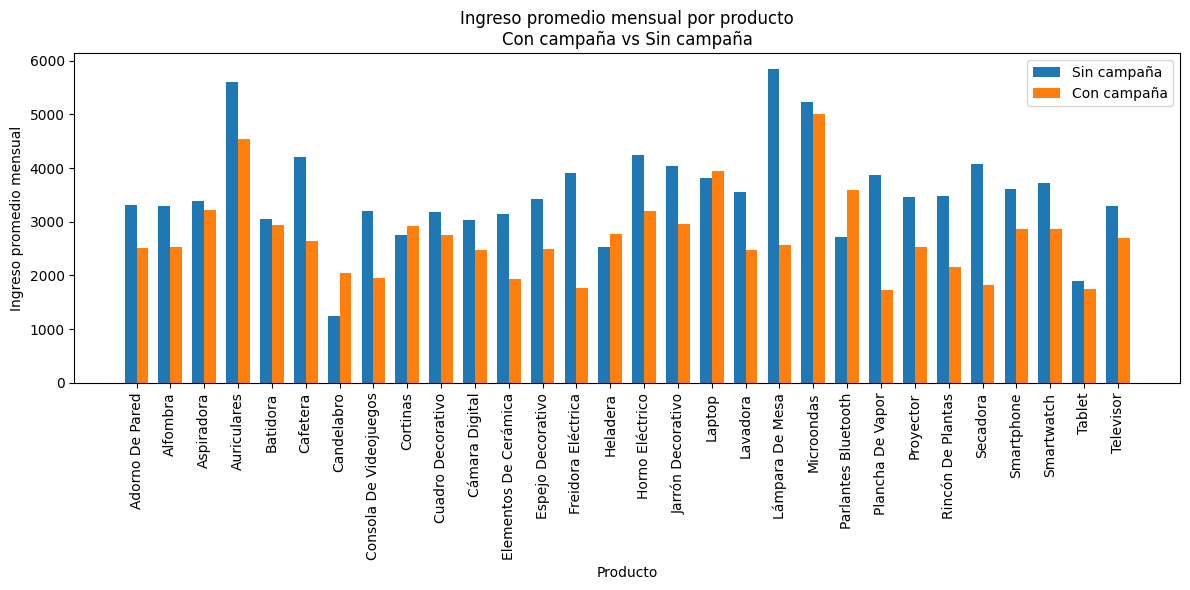

In [61]:
# Grafico con cada producto, teniendo la variable de producto en x con su promedio mensual segun Con campaña o Sin campaña,
# para analizar si fueron efectivas las campañas o no

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(tabla_producto.index))
width = 0.35

plt.figure(figsize=(12, 6))

plt.bar(x - width/2, tabla_producto[False], width, label="Sin campaña")
plt.bar(x + width/2, tabla_producto[True], width, label="Con campaña")

plt.xlabel("Producto")
plt.ylabel("Ingreso promedio mensual")
plt.title("Ingreso promedio mensual por producto\nCon campaña vs Sin campaña")

plt.xticks(x, tabla_producto.index, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

### Etapa 3: Exploración de datos

Etapa 3.1: Estadistica descriptivas

In [62]:

campanha_x_productos = marketing_clean.groupby(["producto"]).agg(
    costo_total=("costo", "sum"),
)

ventas_con_total = ventas_clean.copy()
ventas_con_total["total"] = ventas_con_total["precio"] * ventas_con_total["cantidad"]

ingresos_x_productos = ventas_con_total.merge(
    campanha_x_productos,
    on="producto",
    how="left"
)

ingresos_x_productos = ingresos_x_productos.groupby(["producto"], as_index=False).agg(
    ingreso_total=("total", "sum"),
    cantidad_total=("cantidad", "sum"),
    costo_total=("costo_total", "mean"),
)

display(ingresos_x_productos.head(10))

df_ordenado = ingresos_x_productos.sort_values("ingreso_total", ascending=False)

display(df_ordenado.head(10))


,producto,ingreso_total,cantidad_total,costo_total
0,Adorno De Pared,48093.49,633,14.05
1,Alfombra,44773.06,615,17.46
2,Aspiradora,50085.86,651,16.46
3,Auriculares,74175.58,958,15.24
4,Batidora,50979.2,672,15.28
5,Cafetera,59607.31,765,18.16
6,Candelabro,11128.8,160,14.65
7,Consola De Videojuegos,46174.41,623,12.77
8,Cortinas,44865.03,610,17.36
9,Cuadro Decorativo,54297.6,726,15.85


,producto,ingreso_total,cantidad_total,costo_total
19,Lámpara De Mesa,82276.38,1112,15.93
3,Auriculares,74175.58,958,15.24
20,Microondas,72562.89,912,14.19
5,Cafetera,59607.31,765,18.16
9,Cuadro Decorativo,54297.6,726,15.85
26,Smartphone,54132.44,665,15.80
25,Secadora,52115.45,696,14.59
16,Jarrón Decorativo,51130.88,672,13.27
4,Batidora,50979.2,672,15.28
24,Rincón De Plantas,50456.45,691,16.45


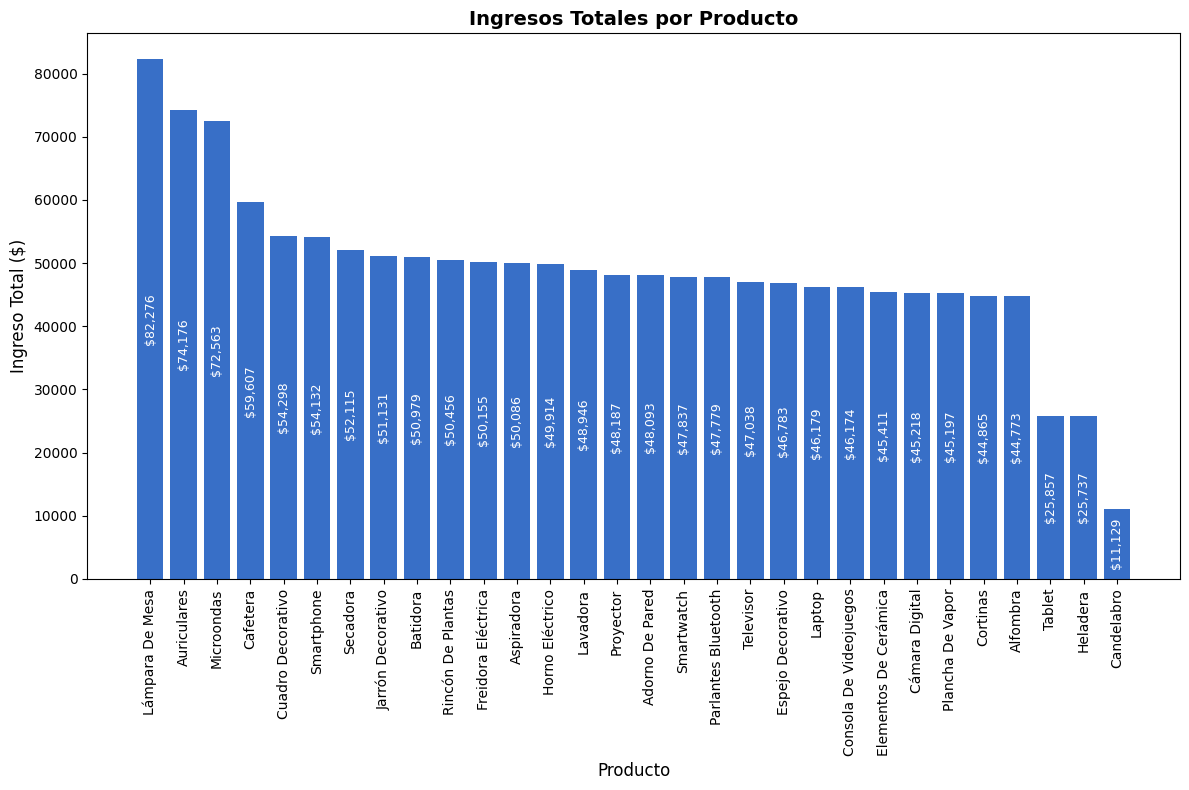

In [63]:
plt.figure(figsize=(12, 8))
color_celeste = "#386FC7"
barras = plt.bar(df_ordenado["producto"], df_ordenado["ingreso_total"], color=color_celeste)
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")
plt.xlabel("Producto", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y
plt.xticks(rotation=90)
for barra in barras:
    y = barra.get_height()

    plt.text(
        barra.get_x() + barra.get_width() / 2,
        y / 2,
        f"${y:,.0f}",
        ha='center',
        va='center',
        fontsize=9,
        color="white",
        rotation=90
    )

# Ajustamos automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostramos el gráfico final
plt.show()

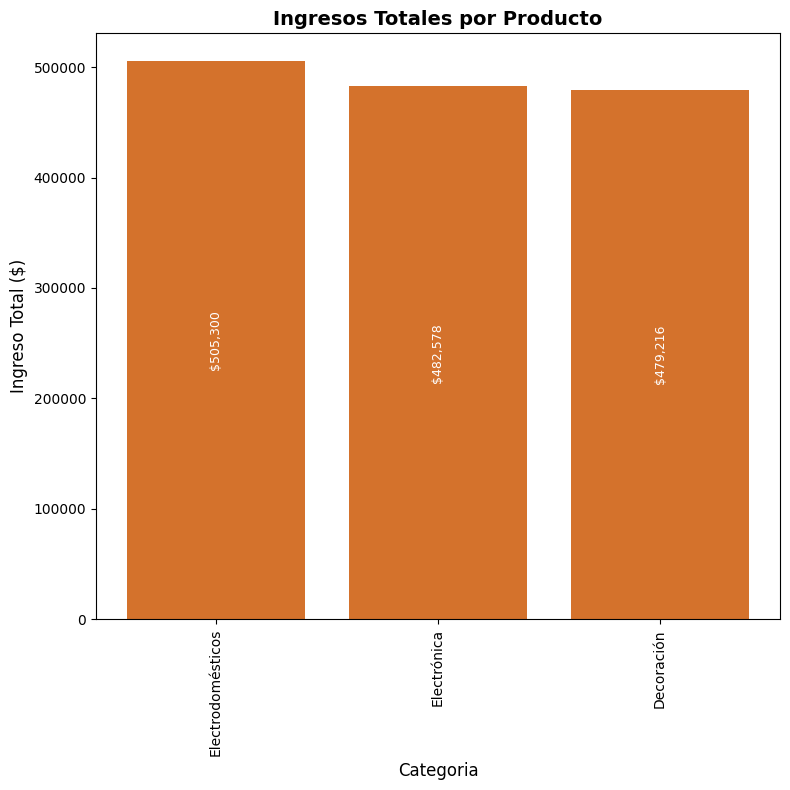

In [64]:
ventas_categoria = ventas_con_total.groupby(["categoria"], as_index=False).agg(
    ingreso_total = ("total", "sum"),
    cantidad_total = ("cantidad", "sum"),
)
df_ordenado = ventas_categoria.sort_values("ingreso_total", ascending=False)


plt.figure(figsize=(8, 8))
color_celeste = "#D4722C"
barras = plt.bar(df_ordenado["categoria"], df_ordenado["ingreso_total"], color=color_celeste)
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")
plt.xlabel("Categoria", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y
plt.xticks(rotation=90)

for barra in barras:
    y = barra.get_height()

    plt.text(
        barra.get_x() + barra.get_width() / 2,
        y / 2,
        f"${y:,.0f}",
        ha='center',
        va='center',
        fontsize=9,
        color="white",
        rotation=90
    )

plt.tight_layout()

plt.show()

In [65]:
media = ingresos_x_productos['ingreso_total'].mean()
mediana = ingresos_x_productos['ingreso_total'].median()
moda = ingresos_x_productos['ingreso_total'].mode()

print("Media:", media)
print("Mediana:", mediana)
print("Moda:")
print(moda)

Media: 48903.117333333335
Mediana: 48140.244999999995
Moda:
0      11128.8
1      25736.8
2     25856.57
3     44773.06
4     44865.03
5     45196.63
6     45217.96
7     45411.09
8     46174.41
9     46179.48
10    46783.31
11    47038.04
12    47779.46
13    47836.86
14    48093.49
15     48187.0
16    48946.44
17     49913.9
18    50085.86
19    50155.15
20    50456.45
21     50979.2
22    51130.88
23    52115.45
24    54132.44
25     54297.6
26    59607.31
27    72562.89
28    74175.58
29    82276.38
Name: ingreso_total, dtype: Float64


In [66]:
rango = ingresos_x_productos['ingreso_total'].max() - ingresos_x_productos['ingreso_total'].min()
varianza = ingresos_x_productos['ingreso_total'].var(ddof=1)
desviacion = ingresos_x_productos['ingreso_total'].std(ddof=1)

print("Rango:", rango)
print("Varianza:", varianza)
print("Desviación estándar:", desviacion)

Rango: 71147.58
Varianza: 175975127.6254547
Desviación estándar: 13265.561715413889


In [67]:
print(f"Media de Ingreso Total: {media:,.2f}")
print(f"Mediana de Ingreso Total: {mediana:,.2f}")
print(f"Desviación Estándar de Ingreso Total: {desviacion:,.2f}")
print(f"Rango de Ingreso Total: {rango:,.2f}")

Media de Ingreso Total: 48,903.12
Mediana de Ingreso Total: 48,140.24
Desviación Estándar de Ingreso Total: 13,265.56
Rango de Ingreso Total: 71,147.58


In [68]:
q1 = ingresos_x_productos['ingreso_total'].quantile(0.25)
q2 = ingresos_x_productos['ingreso_total'].quantile(0.5)
q3 = ingresos_x_productos['ingreso_total'].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Mediana (Q2):", q2)
print("Q3:", q3)
print("IQR:", iqr)

Q1: 45601.92
Mediana (Q2): 48140.244999999995
Q3: 51092.96
IQR: 5491.040000000001


In [69]:
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = ingresos_x_productos[(ingresos_x_productos['ingreso_total'] < lim_inf) | (ingresos_x_productos['ingreso_total'] > lim_sup)]

print("Límite inferior:", lim_inf)
print("Límite superior:", lim_sup)
print("\nOutliers detectados:")
print(outliers)

Límite inferior: 37365.36
Límite superior: 59329.520000000004

Outliers detectados:
           producto  ingreso_total  cantidad_total  costo_total
3       Auriculares       74175.58             958        15.24
5          Cafetera       59607.31             765        18.16
6        Candelabro        11128.8             160        14.65
14         Heladera        25736.8             330        13.11
19  Lámpara De Mesa       82276.38            1112        15.93
20       Microondas       72562.89             912        14.19
28           Tablet       25856.57             374        12.72


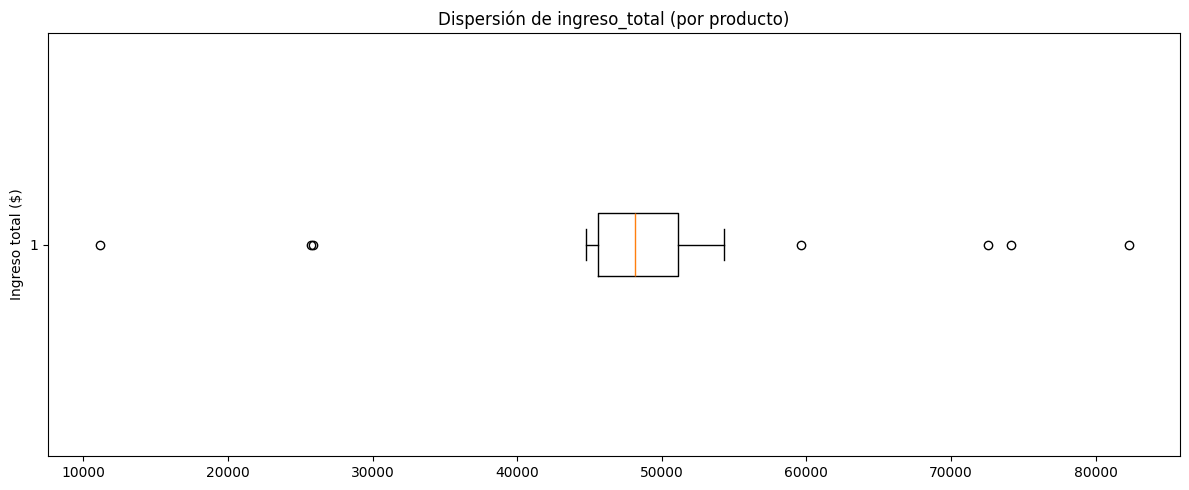

In [70]:
vals = resumen_prod['ingreso_total'].dropna()

plt.figure(figsize=(12, 5))
plt.boxplot(vals, vert=False)
plt.title('Dispersión de ingreso_total (por producto)')
plt.ylabel('Ingreso total ($)')
plt.tight_layout()
plt.show()

In [71]:
display(resumen_prod)

,producto,ingreso_total,unidades,precio_promedio,registros
0,Adorno De Pared,48093.49,633,76.097800,100
1,Alfombra,44773.06,615,74.098300,100
2,Aspiradora,50085.86,651,77.447400,100
3,Auriculares,74175.58,958,76.302727,143
4,Batidora,50979.2,672,77.537200,100
5,Cafetera,59607.31,765,79.046581,117
6,Candelabro,11128.8,160,74.595417,24
7,Consola De Videojuegos,46174.41,623,76.346869,99
8,Cortinas,44865.03,610,73.649900,100
9,Cuadro Decorativo,54297.6,726,74.578000,100


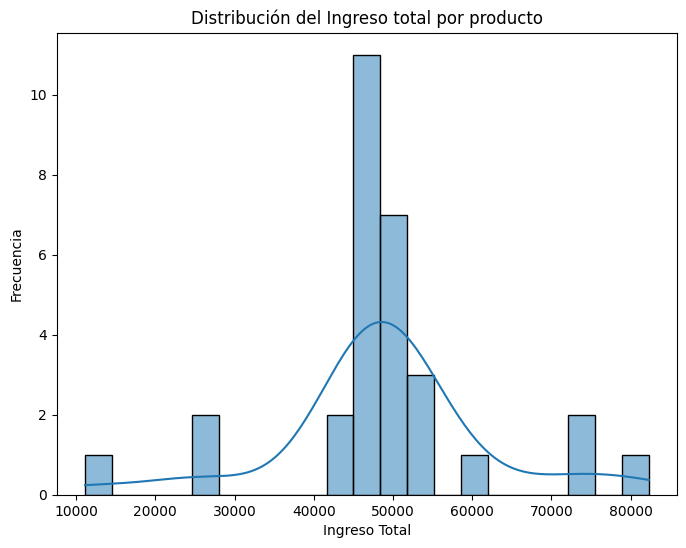

In [72]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(vals, kde=True)
plt.title('Distribución del Ingreso total por producto')
plt.xlabel('Ingreso Total')
plt.ylabel('Frecuencia')
plt.show()

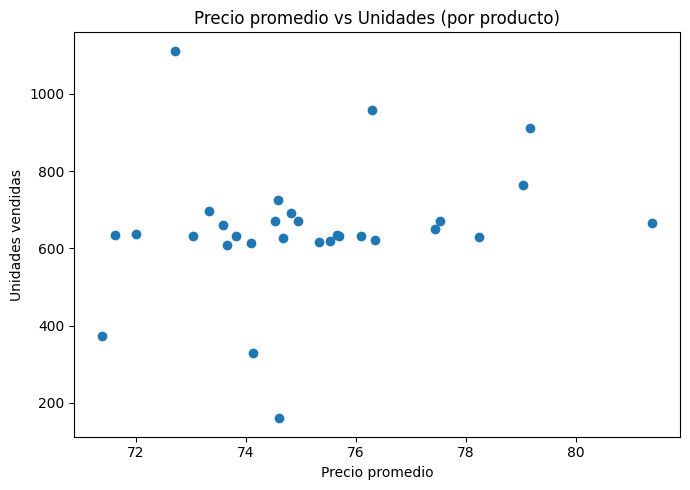

In [73]:
x = resumen_prod['precio_promedio']
y = resumen_prod['unidades']

plt.figure(figsize=(7, 5))
plt.scatter(x, y)
plt.title('Precio promedio vs Unidades (por producto)')
plt.xlabel('Precio promedio')
plt.ylabel('Unidades vendidas')
plt.tight_layout()
plt.show()

In [74]:
corr_val = resumen_prod[['precio_promedio','unidades']].corr().loc['precio_promedio','unidades']

print(f"Coeficiente de correlación (Pearson): {corr_val:.3f}")
if corr_val > 0.8:
    print("Interpretación: relación positiva clara (a mayor precio_promedio, suelen venderse más unidades).")
elif corr_val > 0.2:
    print("Interpretación: relación positiva débil a moderada.")
elif corr_val < -0.8:
    print("Interpretación: relación negativa clara (a mayor precio_promedio, suelen venderse menos unidades).")
elif corr_val < -0.3:
    print("Interpretación: relación negativa débil a moderada.")
else:
    print("Interpretación: relación muy débil o nula.")

Coeficiente de correlación (Pearson): 0.217
Interpretación: relación positiva débil a moderada.


### Etapa 4.1: Visualizacion con Matplotib

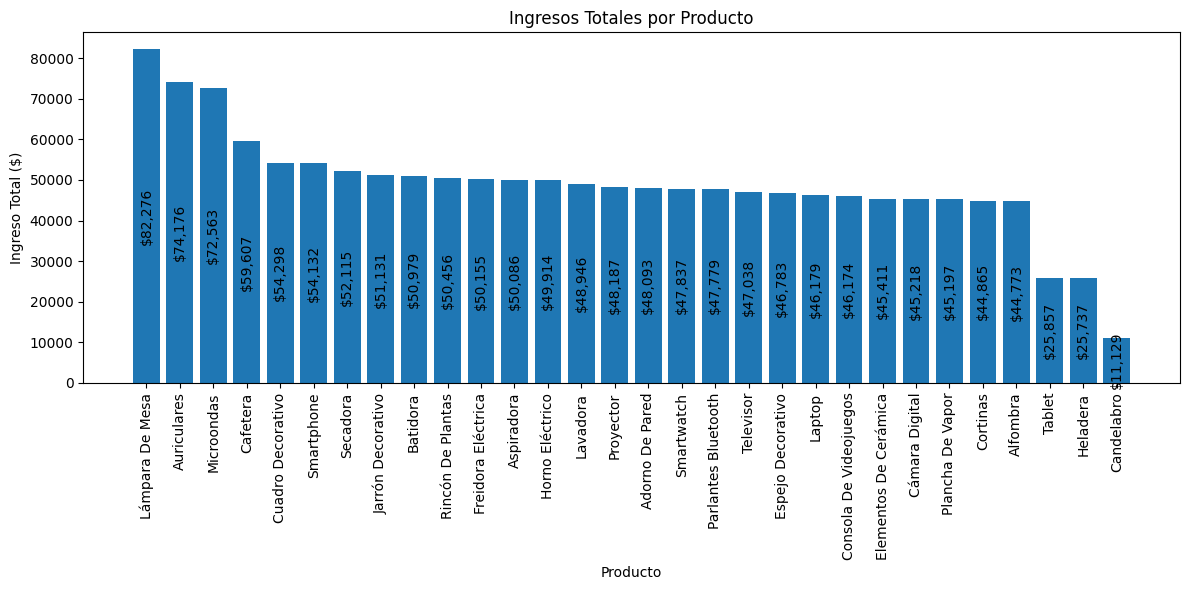

In [75]:
import matplotlib.pyplot as plt  # importamos la librería de gráficos

df = resumen_prod.copy()                                # copiamos para no modificar el original
df_ordenado = df.sort_values('ingreso_total', ascending=False)  # ordenamos desc por ingreso

plt.figure(figsize=(12, 6))                             # tamaño del gráfico
barras = plt.bar(df_ordenado['producto'], df_ordenado['ingreso_total'])  # dibujamos las barras

plt.title('Ingresos Totales por Producto')              # título del gráfico
plt.xlabel('Producto')                                  # etiqueta eje X
plt.ylabel('Ingreso Total ($)')                         # etiqueta eje Y
plt.xticks(rotation=90)                                  # rotamos etiquetas del eje X para legibilidad

# Etiquetamos el valor dentro de cada barra (texto vertical)
for b in barras:
    h = b.get_height()                                  # altura de la barra (valor)
    x_c = b.get_x() + b.get_width()/2                   # centro horizontal de la barra
    plt.text(x_c, h/2, f"${h:,.0f}", ha='center', va='center', rotation=90)  # texto dentro, vertical

plt.tight_layout()                                      # ajustar márgenes
plt.show()                                              # mostrar gráfico

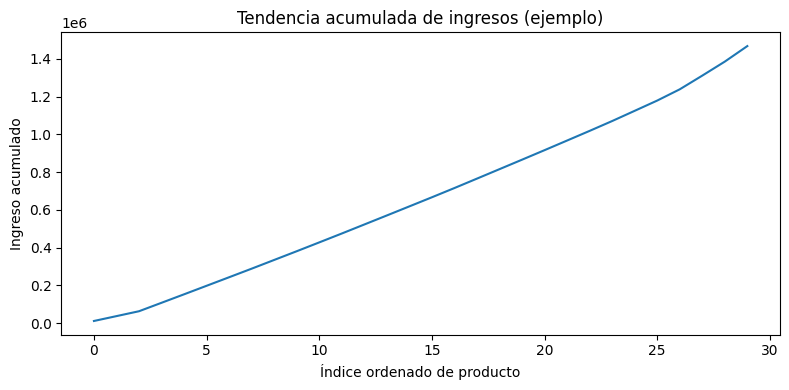

In [76]:
# =========================================
# 📉 Líneas: ejemplo simple de tendencia acumulada
# =========================================


import matplotlib.pyplot as plt
import numpy as np

valores = resumen_prod['ingreso_total'].sort_values().values  # tomamos ingresos ordenados
acum = np.cumsum(valores)                                     # acumulado simple (ejemplo)

plt.figure(figsize=(8, 4))   # tamaño del gráfico
plt.plot(acum)               # línea simple
plt.title('Tendencia acumulada de ingresos (ejemplo)')
plt.xlabel('Índice ordenado de producto')
plt.ylabel('Ingreso acumulado')
plt.tight_layout()
plt.show()

In [77]:

# Agrupamos las ventas por fecha y sumamos los ingresos de cada día
# Convertimos la columna 'fecha_venta' a tipo datetime (por seguridad)
ventas_perf['fecha_venta'] = pd.to_datetime(ventas_perf['fecha_venta'], errors='coerce')
ingresos_por_dia = ventas_perf.groupby('fecha_venta')['ingreso'].sum().sort_index()
print(ingresos_por_dia.head(160))


fecha_venta
2024-01-02    3751.26
2024-01-03    3601.84
2024-01-04    5241.78
2024-01-05    4758.53
2024-01-06     2899.6
               ...   
2024-06-05    3357.26
2024-06-06    4107.55
2024-06-07    2389.56
2024-06-08    6433.07
2024-06-09    2260.46
Name: ingreso, Length: 160, dtype: Float64


In [78]:
ingresos_acumulados = ingresos_por_dia.cumsum()
print(ingresos_acumulados)

fecha_venta
2024-01-02       3751.26
2024-01-03        7353.1
2024-01-04      12594.88
2024-01-05      17353.41
2024-01-06      20253.01
                 ...    
2024-12-26    1451156.47
2024-12-27    1453820.73
2024-12-28    1457006.58
2024-12-29    1461227.29
2024-12-30    1467093.52
Name: ingreso, Length: 364, dtype: Float64


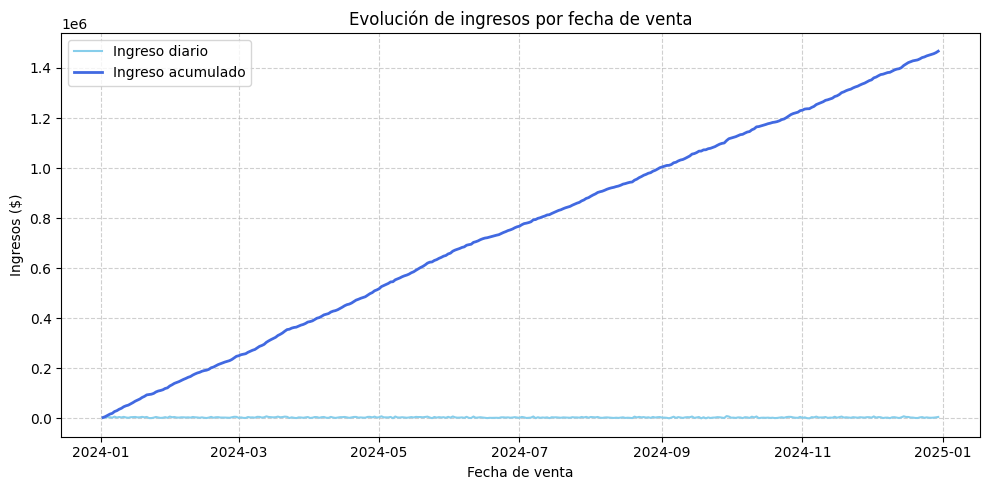

In [79]:
# =========================================
# 📉 Tendencia real de ingresos a lo largo del tiempo
# =========================================
# Usamos el dataset 'ventas_perf', que contiene la fecha y el ingreso de cada registro.

import matplotlib.pyplot as plt
import pandas as pd

# Convertimos la columna 'fecha_venta' a tipo datetime (por seguridad)
ventas_perf['fecha_venta'] = pd.to_datetime(ventas_perf['fecha_venta'], errors='coerce')

# Agrupamos las ventas por fecha y sumamos los ingresos de cada día
ingresos_por_dia = ventas_perf.groupby('fecha_venta')['ingreso'].sum().sort_index()

# Calculamos el acumulado de ingresos
ingresos_acumulados = ingresos_por_dia.cumsum()

# Graficamos ambas curvas: ingresos diarios y acumulados
plt.figure(figsize=(10,5))

# Línea 1: ingresos diarios
plt.plot(ingresos_por_dia, color='skyblue', label='Ingreso diario')

# Línea 2: ingresos acumulados
plt.plot(ingresos_acumulados, color='royalblue', label='Ingreso acumulado', linewidth=2)

# Personalización del gráfico
plt.title('Evolución de ingresos por fecha de venta')
plt.xlabel('Fecha de venta')
plt.ylabel('Ingresos ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 🧠 Interpretación:
# - La línea celeste muestra los ingresos de cada día.
# - La línea azul muestra el crecimiento acumulado total.
# Si la curva acumulada es ascendente constante → ventas estables.
# Si aparecen saltos abruptos → picos de venta (promociones o campañas de marketing).

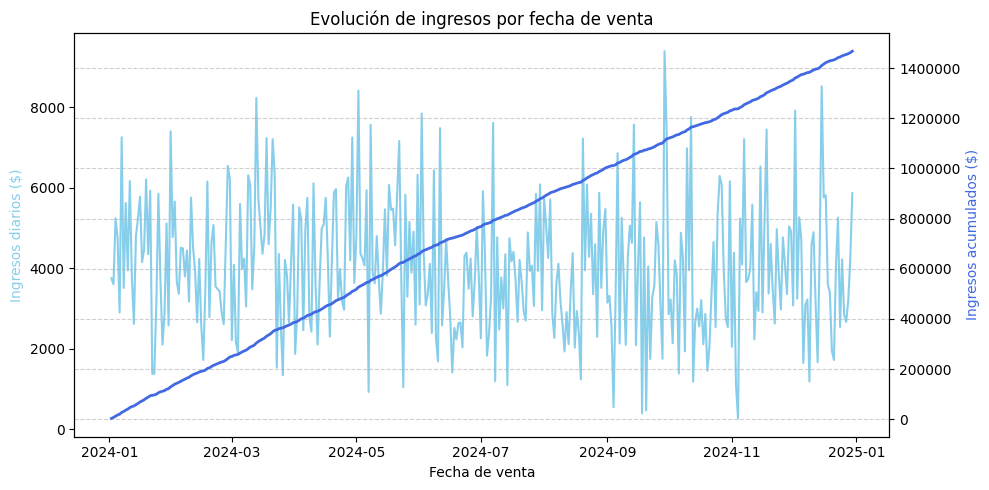

In [80]:
# 📉 Tendencia real de ingresos a lo largo del tiempo
import matplotlib.pyplot as plt
import pandas as pd
fig, ax1 = plt.subplots(figsize=(10, 5))
#eje izquierdo ingresos diarios
ax1.plot(ingresos_por_dia, color='skyblue', label='Ingreso diario')
ax1.set_xlabel('Fecha de venta')
ax1.set_ylabel('Ingresos diarios ($)', color='skyblue')
ax1.ticklabel_format(style='plain', axis= 'y')

#eje derecho que son los ingresos acumulados
ax2 = ax1.twinx()
ax2.plot(ingresos_acumulados, color='royalblue', label='Ingreso acumulado', linewidth=2)
ax2.set_ylabel('Ingresos acumulados ($)', color='royalblue')
ax2.ticklabel_format(style='plain', axis= 'y')
# Personalización del gráfico
plt.title('Evolución de ingresos por fecha de venta')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Etapa 4.2: Visualizacion con Seaborn

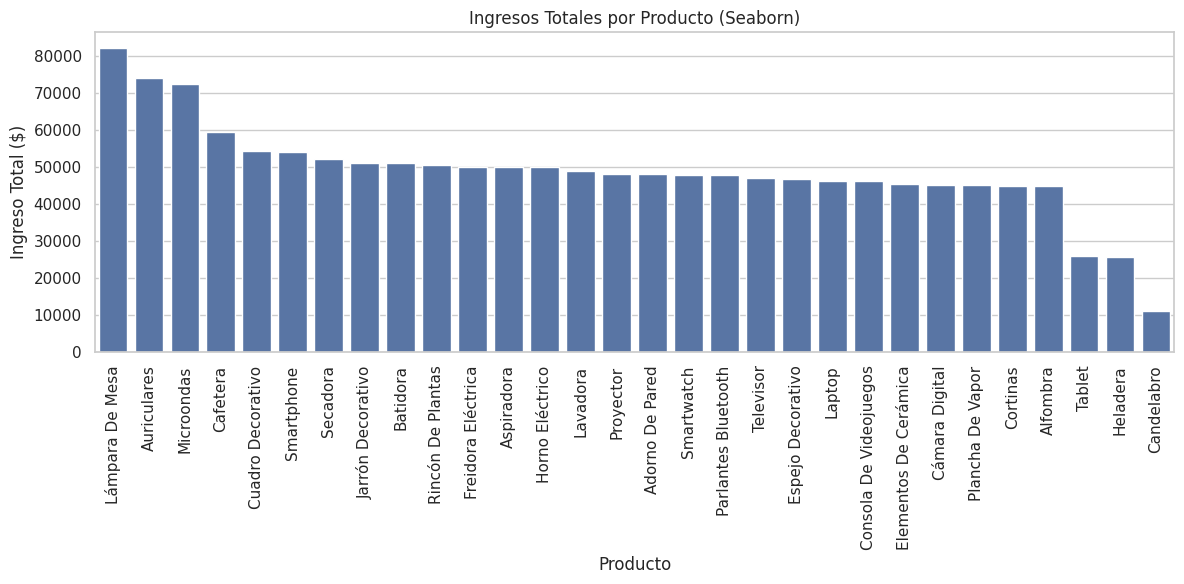

In [81]:

# =========================================
# 🌈 Seaborn: barras ordenadas y boxplot por categoría
# =========================================

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")      # estilo claro por defecto

# Barras ordenadas (Seaborn)
df = resumen_prod.sort_values('ingreso_total', ascending=False)  # ordenamos
plt.figure(figsize=(12, 6))                                      # tamaño
ax = sns.barplot(data=df, x='producto', y='ingreso_total')       # barras
ax.set_title('Ingresos Totales por Producto (Seaborn)')          # título
ax.set_xlabel('Producto'); ax.set_ylabel('Ingreso Total ($)')    # etiquetas
plt.xticks(rotation=90)                                          # rotamos etiquetas
plt.tight_layout(); plt.show()                                   # mostrar

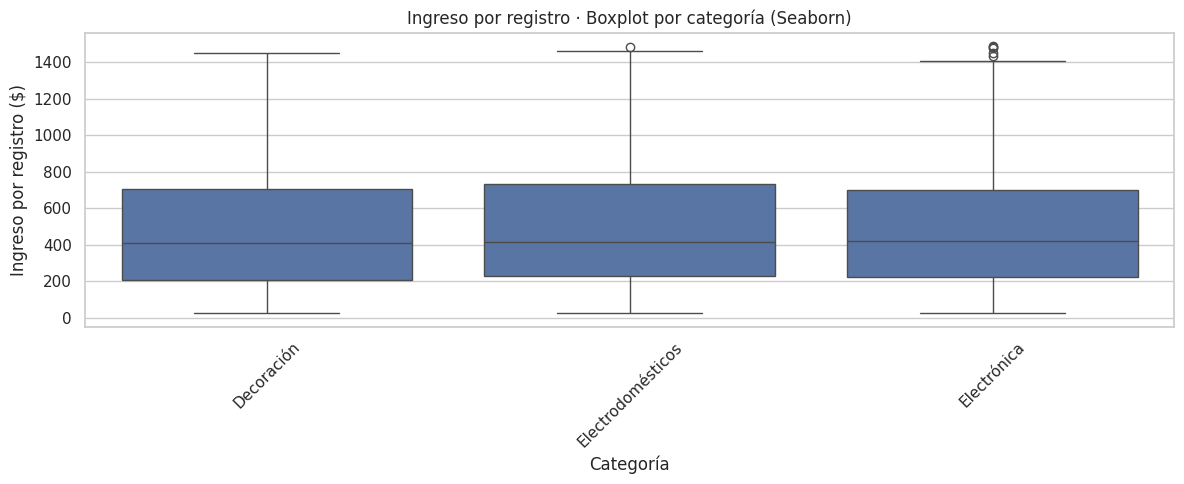

In [82]:
# Boxplot por categoría (ingreso por registro)
plt.figure(figsize=(12, 5))                                      # tamaño
ax = sns.boxplot(data=ventas_perf, x='categoria', y='ingreso')   # boxplot
ax.set_title('Ingreso por registro · Boxplot por categoría (Seaborn)')  # título
ax.set_xlabel('Categoría'); ax.set_ylabel('Ingreso por registro ($)')   # etiquetas
plt.xticks(rotation=45)                                          # rotamos etiquetas
plt.tight_layout(); plt.show()                                   # mostrar


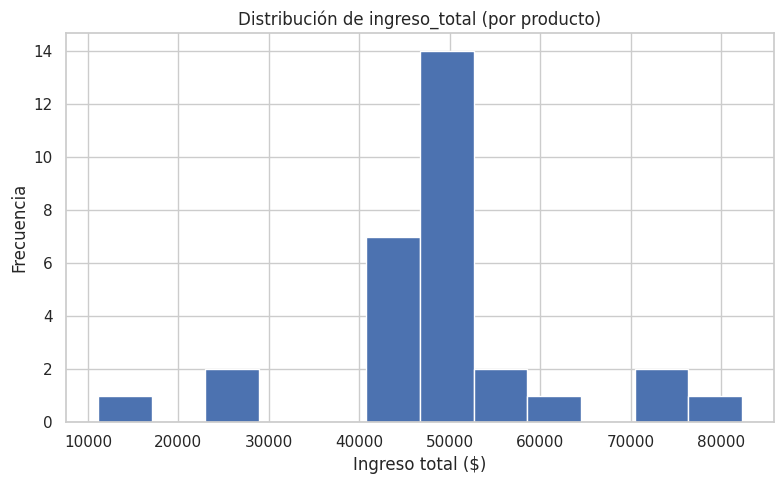

In [83]:

# =========================================
# 📈 Histograma: distribución de ingreso_total (por producto)
# =========================================

import matplotlib.pyplot as plt  # importamos la librería de gráficos

serie = resumen_prod['ingreso_total']        # elegimos la serie numérica a analizar

plt.figure(figsize=(8, 5))                   # definimos tamaño del gráfico
plt.hist(serie, bins=12)                     # dibujamos histograma con 12 intervalos
plt.title('Distribución de ingreso_total (por producto)')  # título del gráfico
plt.xlabel('Ingreso total ($)')              # etiqueta del eje X
plt.ylabel('Frecuencia')                     # etiqueta del eje Y
plt.tight_layout()                           # ajustamos márgenes para que no se corte el contenido
plt.show()                                   # mostramos el gráfico
